# Network Comparison

## Time per Epoch

In [ ]:
import re
import csv
import numpy as np
import matplotlib.pyplot as plt
from glob import glob


names = {
    'mnist': 'MNIST',
    'fashion_mnist': 'Fashion MNIST',
    'cifar10': 'CIFAR10',
    'imdb': 'IMDB',
    'lenet': 'LeNet',
    'lstm': 'LSTM'
}


def show():
    fig = plt.figure(figsize=(12, 8), dpi=100)
    fig.suptitle('Time per Epoch', fontsize=18, y=0.95)
    fig.text(0.5, 0.06, 'epoch', ha='center', fontsize=12)
    
    def get_data(dataset_name):
        data = {}
        dir_paths = glob(f'../data/{dataset_name}_*_*')
        dir_paths.sort()
        for dir_path in dir_paths:
            optimizer_name = re.search(r'../data/.+_.+_(.+)', dir_path).group(1)
            temp = []
            for path in glob(f'{dir_path}/*/time.csv'):
                with open(path) as f:
                    rows = np.array([row for row in csv.reader(f)])
                row = rows[1:, 1:]
                row = row.reshape(len(row))
                row = row.astype(np.float)
                temp.append(row)
            data[optimizer_name] = np.mean(np.array(temp), axis=0)
        return data
    
    dataset_names = ('mnist', 'fashion_mnist', 'cifar10', 'imdb')
    for i, dataset_name in enumerate(dataset_names):
        ax = fig.add_subplot(int('22' + str(i + 1)))
        model_name = 'lstm' if dataset_name == 'imdb' else 'lenet'
        ax.set_title(f'{names[dataset_name]} {names[model_name]}')
        
        max_y = 0
        min_y = np.inf
        data = get_data(dataset_name)
        for optimizer_name, y in data.items():
            max_y = max(y[5:]) if max(y[5:]) > max_y else max_y
            min_y = min(y[5:]) if min(y[5:]) < min_y else min_y
            
            x = np.arange(0, len(y), 1)
            ax.plot(x, y, label=optimizer_name)
        
        d = (max_y - min_y) / 10
        ax.set_ylim(min_y - d, max_y + d)
    
    plt.legend(bbox_to_anchor=(1.4, 2.2), loc='upper right', borderaxespad=1)
    plt.show()

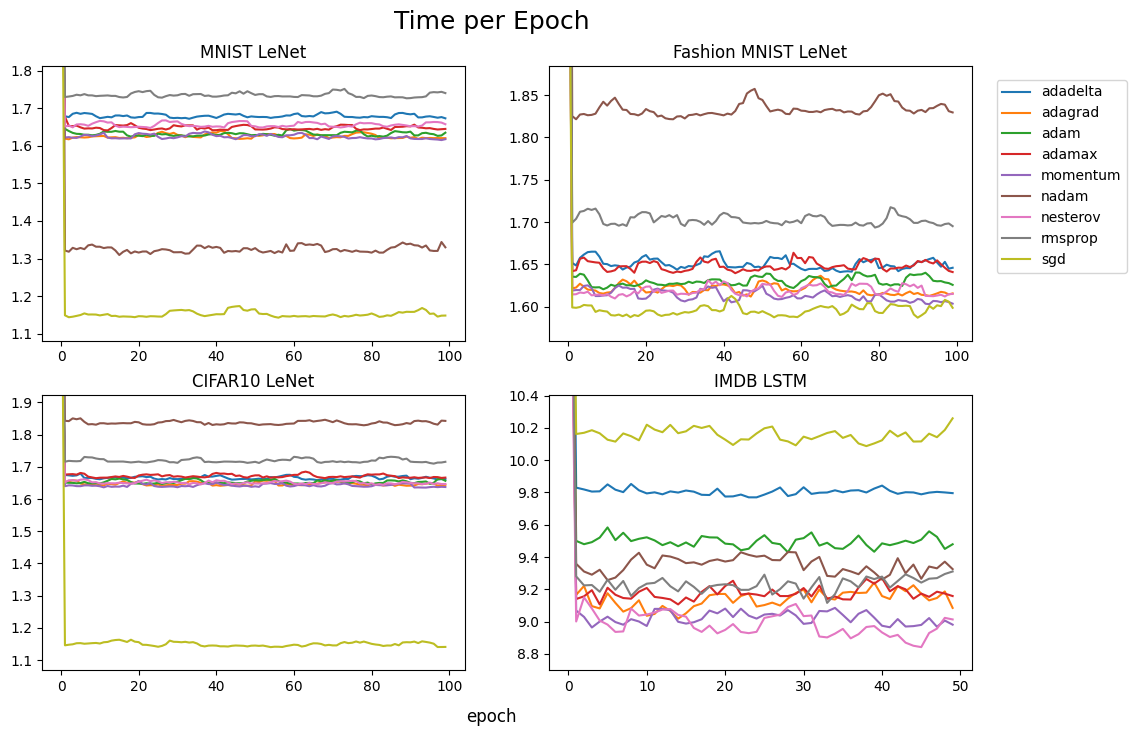

In [209]:
show()